In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
data_display = pd.read_csv("parsed_alldata.csv")

print(data_display)

      WL1(mm)  WL2(mm)  WL3(mm)  WL4 (mm)  WL5 (mm)  Solar (W/m2)  \
0          65      213       94        37        43           415   
1          65      211      101        37        43           329   
2          66      211      102        36        43           115   
3          64      212       88        36        43            31   
4          65      210       95        36        43             1   
...       ...      ...      ...       ...       ...           ...   
1425       39       41       41        36        44           665   
1426       39       41       41        36        43           557   
1427       39       41       41        37        44           395   
1428       39       41       41        36        43           208   
1429       39       41       41        36        44            44   

      Precipitation (mm)  AirTemp (DegC)  RH (%)  PD (mm)  
0                  0.000            34.0      51     70.5  
1                  0.000            33.5      67   

In [3]:
learning_rate = 0.01
trainning_steps = 20000
display_step = 1000

In [7]:
data = np.loadtxt("parsed_alldata_np.csv", delimiter = ',', dtype = np.float32)

x_train = data[:1200, [0]]
y_train = data[:1200, [-1]]

x_test = data[1200:, [0]]
y_test = data[1200:, [-1]]

w = tf.Variable(random.random())
bias = tf.Variable(random.random())

In [9]:
def compute_loss():
    hypothesis = w * x_train + b
    loss = tf.reduce_mean((y_train - hypothesis) ** 2)
    return loss

optimizer = tf.optimizers.Adam(lr = learning_rate)

for step in range(1, trainning_steps + 1):
    optimizer.minimize(compute_loss, var_list = [w, b])
    
    if step % display_step == 0:
        print('step:', step, '\n', 'w:', w.numpy(), '\n', 'bias:', bias.numpy(), 
              '\n', 'loss:', compute_loss().numpy(), '\n')

step: 1000 
 w: 0.10563602 
 bias: 0.23941995 
 loss: 7.2958007 

step: 2000 
 w: 0.1056367 
 bias: 0.23941995 
 loss: 7.295791 

step: 3000 
 w: 0.10563101 
 bias: 0.23941995 
 loss: 7.2958016 

step: 4000 
 w: 0.10563643 
 bias: 0.23941995 
 loss: 7.2958007 

step: 5000 
 w: 0.10544193 
 bias: 0.23941995 
 loss: 7.295889 

step: 6000 
 w: 0.1056403 
 bias: 0.23941995 
 loss: 7.2957945 

step: 7000 
 w: 0.10563724 
 bias: 0.23941995 
 loss: 7.2957983 

step: 8000 
 w: 0.105656855 
 bias: 0.23941995 
 loss: 7.2958016 

step: 9000 
 w: 0.10564984 
 bias: 0.23941995 
 loss: 7.2957997 

step: 10000 
 w: 0.10563676 
 bias: 0.23941995 
 loss: 7.2957993 

step: 11000 
 w: 0.10563677 
 bias: 0.23941995 
 loss: 7.2957993 

step: 12000 
 w: 0.10563676 
 bias: 0.23941995 
 loss: 7.2957993 

step: 13000 
 w: 0.105636716 
 bias: 0.23941995 
 loss: 7.2957993 

step: 14000 
 w: 0.105636716 
 bias: 0.23941995 
 loss: 7.2957993 

step: 15000 
 w: 0.105636716 
 bias: 0.23941995 
 loss: 7.2957993 

step

In [10]:
line_x = np.arange(min(x_test), max(x_test), 0.01)
line_y = w * line_x + b

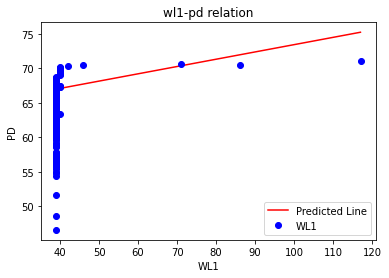

In [16]:
#plt.figure(figsize = (15, 5))

plt.plot(line_x, line_y, 'r-', label = 'Predicted Line')
plt.plot(x_test, y_test, 'bo', label = 'WL1')
plt.title('wl1-pd relation')
plt.xlabel('WL1')
plt.ylabel('PD')
plt.legend(loc = 'lower right')
plt.show()

In [14]:
def rmse(x_test, y_test):
    y_hat = w * x_test + b
    error = y_hat - y_test
    mse = np.mean(error * error)
    rmse = np.sqrt(mse)
    
    return rmse

In [15]:
print(rmse(x_test, y_test))

4.892718
